### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("../../Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['wn'] = wn

C:\Users\animathur\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1089.224366
std,292.559287,293.517625
min,438.920000,-25.447768
25%,914.620000,890.735183
50%,1144.650000,1089.340983
75%,1316.280729,1282.307541
max,1570.252238,2007.179333


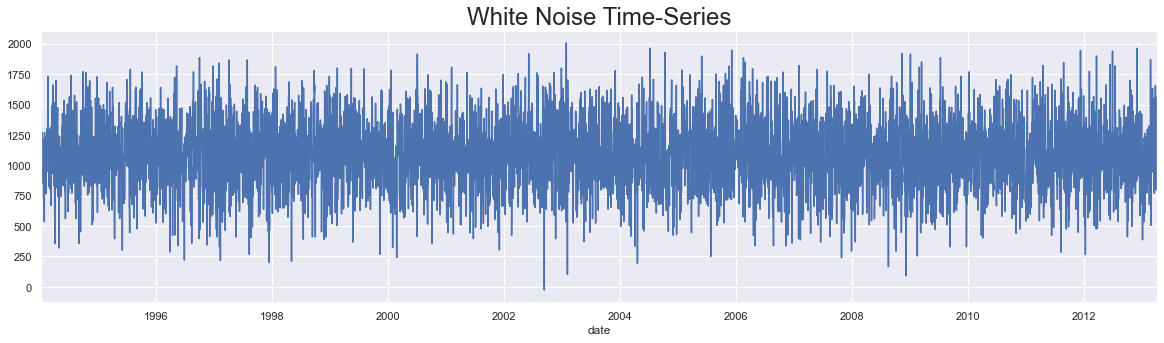

In [10]:
df.wn.plot(figsize = (20, 5))
plt.title('White Noise Time-Series', size = 24)
plt.show()

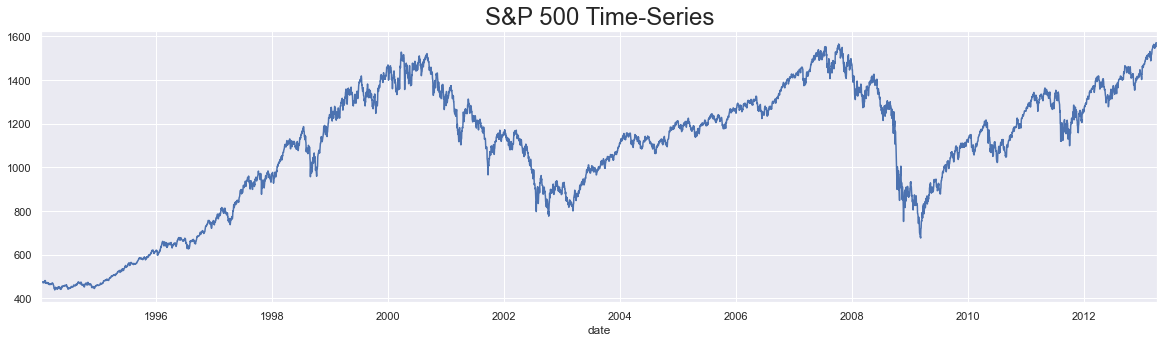

In [11]:
df.market_value.plot(figsize = (20, 5))
plt.title('S&P 500 Time-Series', size = 24)
plt.show()

### Random Walk

In [12]:
rw = pd.read_csv('../S_5_L_22/RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [13]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [14]:
df['rw'] = rw.price

C:\Users\animathur\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1522.564789,1122.139662
1994-01-10,475.27,841.205861,1080.347860
1994-01-11,474.13,1082.267170,1082.095245
1994-01-12,474.17,986.993073,1083.639265
1994-01-13,472.47,1268.697029,1067.146255


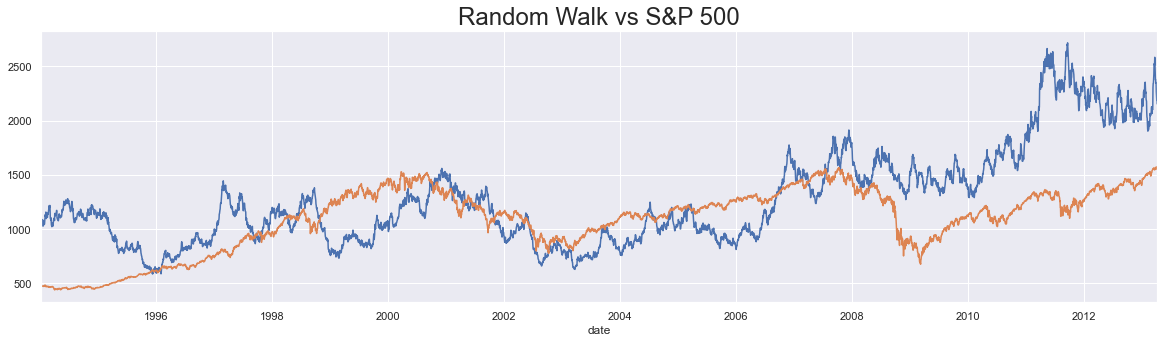

In [16]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P 500", size = 24)
plt.show()

### Stationarity

In [17]:
sts.adfuller(df.market_value)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [18]:
sts.adfuller(df.wn)

(-70.92637169968582,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70854.0125394654)

In [19]:
sts.adfuller(df.rw)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

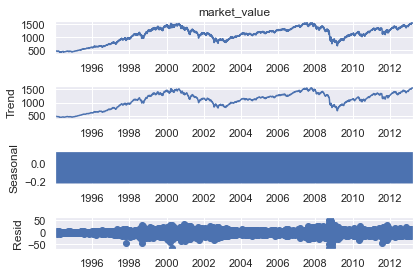

In [22]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()

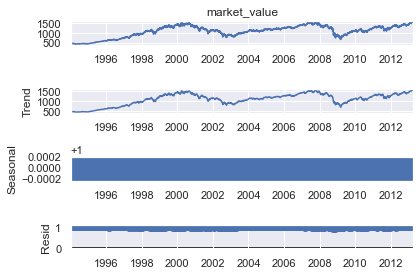

In [23]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

### ACF

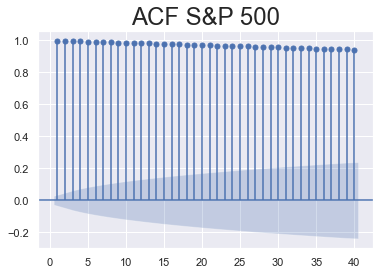

In [25]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P 500", size = 24)
plt.show()

### PACF

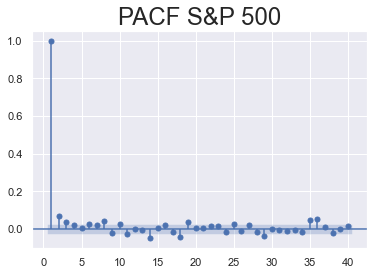

In [26]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P 500", size = 24)
plt.show()

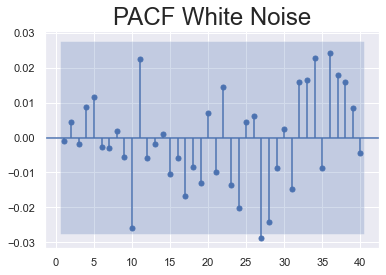

In [27]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF White Noise", size = 24)
plt.show()

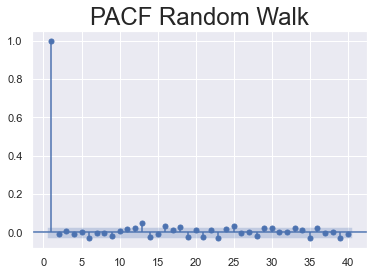

In [28]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Random Walk", size = 24)
plt.show()